# Evaluation for the Decision Tree

After modeling, we raise the question where our models tend to systematic errors. This might help us to further improve our model (e.g., by Feature Engineering).

Especially interesting are systematic errors between "False Positive" and "True Negative" on one hand, and "False Negative" and "True Positive" on the other.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.linear_model import LogisticRegression
from myfunctions import plot_categorical_features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [18]:
# read the dataframes with prediction outcome from last notebook 
df_train_eval = pd.read_pickle('./data/eval/df_train_eval_decision_tree.pkl')
df_test_eval = pd.read_pickle('./data/eval/df_test_eval_decision_tree.pkl')

In [19]:
# create a column that contains the classification outcome

def classification_evaluation(row):
    '''input: row of a dataframe
    output: classification outcome based on y_pred'''
    if row['churn_risk_score'] == 1 and row['y_pred'] == 1:
        return 'TruePositive'
    elif row['churn_risk_score'] == 0 and row['y_pred'] == 0:
        return 'TrueNegative'
    elif row['churn_risk_score'] == 1 and row['y_pred'] == 0:
        return 'FalseNegative'
    elif row['churn_risk_score'] == 0 and row['y_pred'] == 1:
        return 'FalsePositive'

df_test_eval['classification_outcomes'] = df_test_eval.apply(classification_evaluation, axis=1)


In [20]:
df_test_eval.head(20)

gender_M gender_Unknown region_category_Town region_category_Unknown  \
0       0.0            0.0                  0.0                     0.0   
1       0.0            0.0                  0.0                     0.0   
2       1.0            0.0                  1.0                     0.0   
3       1.0            0.0                  0.0                     1.0   
4       0.0            0.0                  0.0                     1.0   
5       1.0            0.0                  0.0                     1.0   
6       0.0            0.0                  0.0                     0.0   
7       0.0            0.0                  1.0                     0.0   
8       0.0            0.0                  1.0                     0.0   
9       1.0            0.0                  0.0                     0.0   
10      1.0            0.0                  1.0                     0.0   
11      1.0            0.0                  0.0                     0.0   
12      0.0            0.0                  1.0                     0.0   
13      1.0            0.0                  1.0                     0.0   
14      0.0            0.0                  0.0                     1.0   
15      0.0            0.0                  1.0                     0.0   
16      1.0            0.0                  0.0                     0.0   
17      0.0            0.0                  1.0                     0.0   
18      0.0            0.0                  1.0                     0.0   
19      0.0            0.0                  1.0                     0.0   

   region_category_Village joined_through_referral_Unknown  \
0                      0.0                             1.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   
5                      0.0                             0.0   
6                      0.0                             0.0   
7                      0.0                             0.0   
8                      0.0                             1.0   
9                      0.0                             1.0   
10                     0.0                             0.0   
11                     0.0                             0.0   
12                     0.0                             0.0   
13                     0.0                             0.0   
14                     0.0                             0.0   
15                     0.0                             0.0   
16                     0.0                             0.0   
17                     0.0                             0.0   
18                     0.0                             0.0   
19                     0.0                             0.0   

   joined_through_referral_Yes preferred_offer_types_Gift Vouchers/Coupons  \
0                          0.0                                         0.0   
1                          1.0                                         0.0   
2                          0.0                                         0.0   
3                          1.0                                         0.0   
4                          0.0                                         0.0   
5                          0.0                                         1.0   
6                          1.0                                         1.0   
7                          0.0                                         1.0   
8                          0.0                                         0.0   
9                          0.0                                         1.0   
10                         0.0                                         1.0   
11                         1.0                                         0.0   
12                         0.0                                         0.0   
13                         1.0  

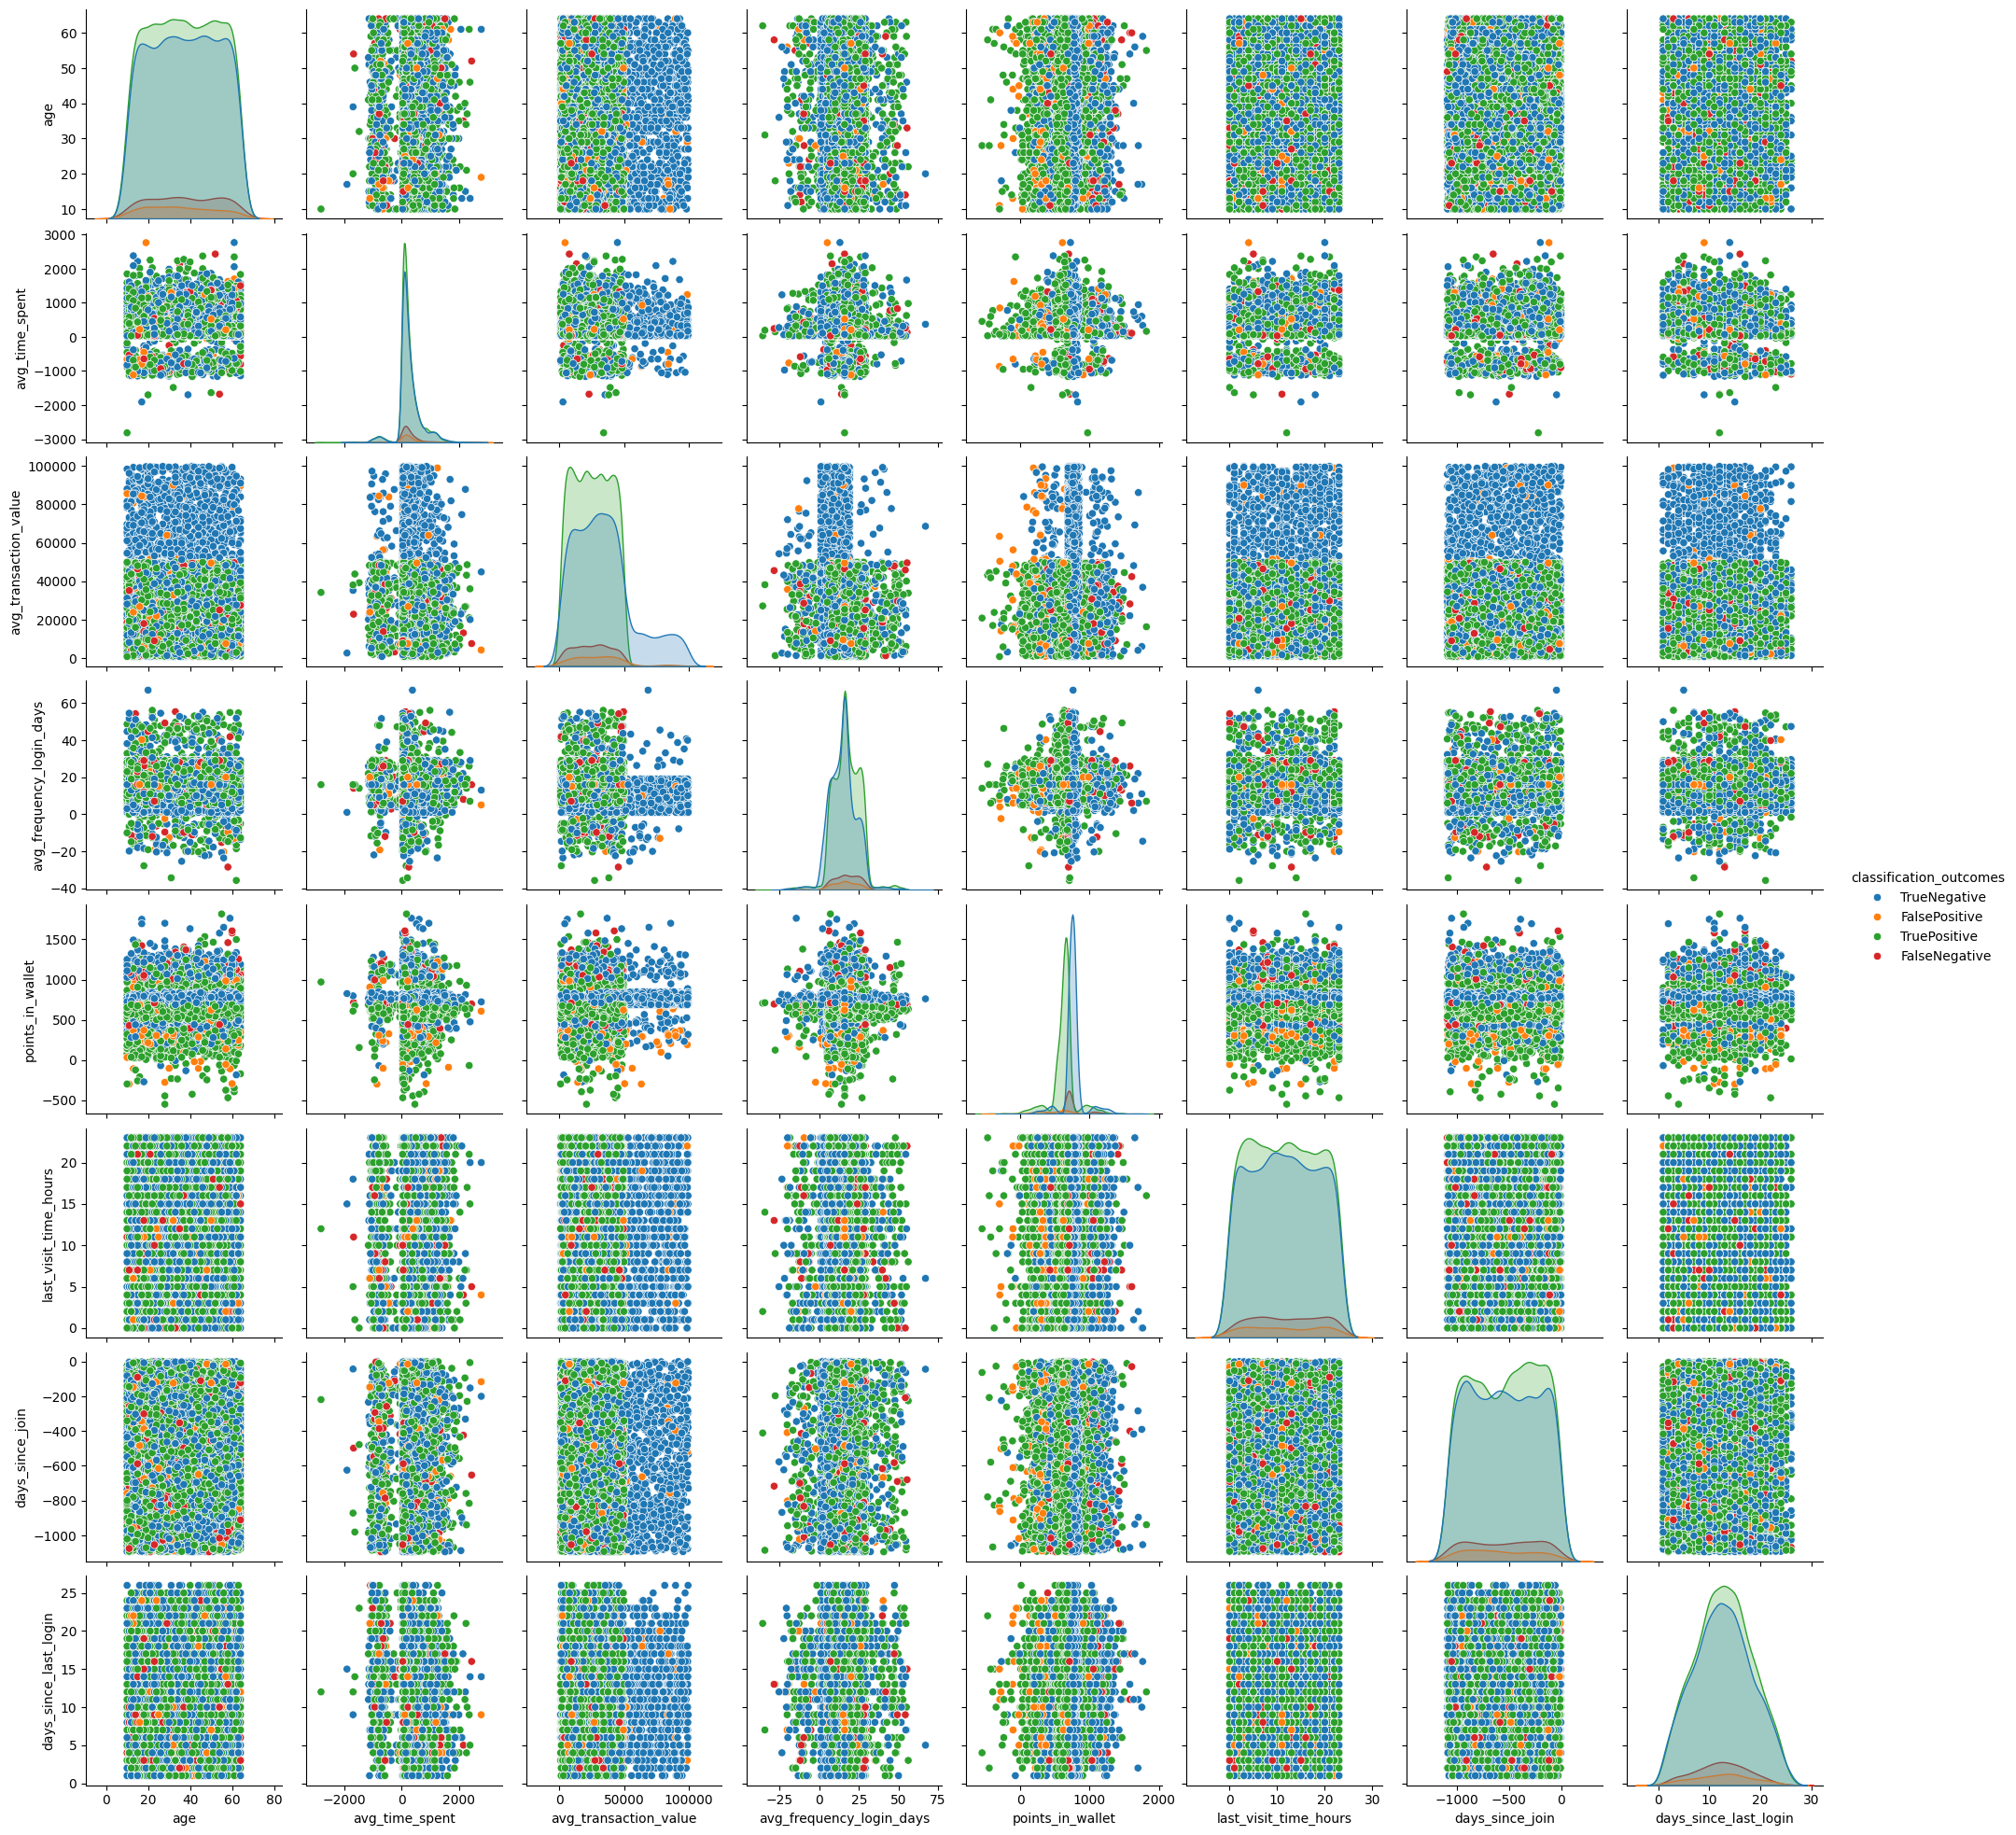

In [21]:
#define numerical features
num_features = ["age", "avg_time_spent", "avg_transaction_value", "avg_frequency_login_days", "points_in_wallet", "last_visit_time_hours", "days_since_join", "days_since_last_login","classification_outcomes"]

#set order for legend
hue_order = ["TrueNegative", "FalsePositive", "TruePositive", "FalseNegative"]

#plot pairplot to get a sense for systematic misevaluations
sns.pairplot(df_test_eval[num_features], hue='classification_outcomes', plot_kws=dict(alpha= 1), hue_order= hue_order)

# EXPLAIN

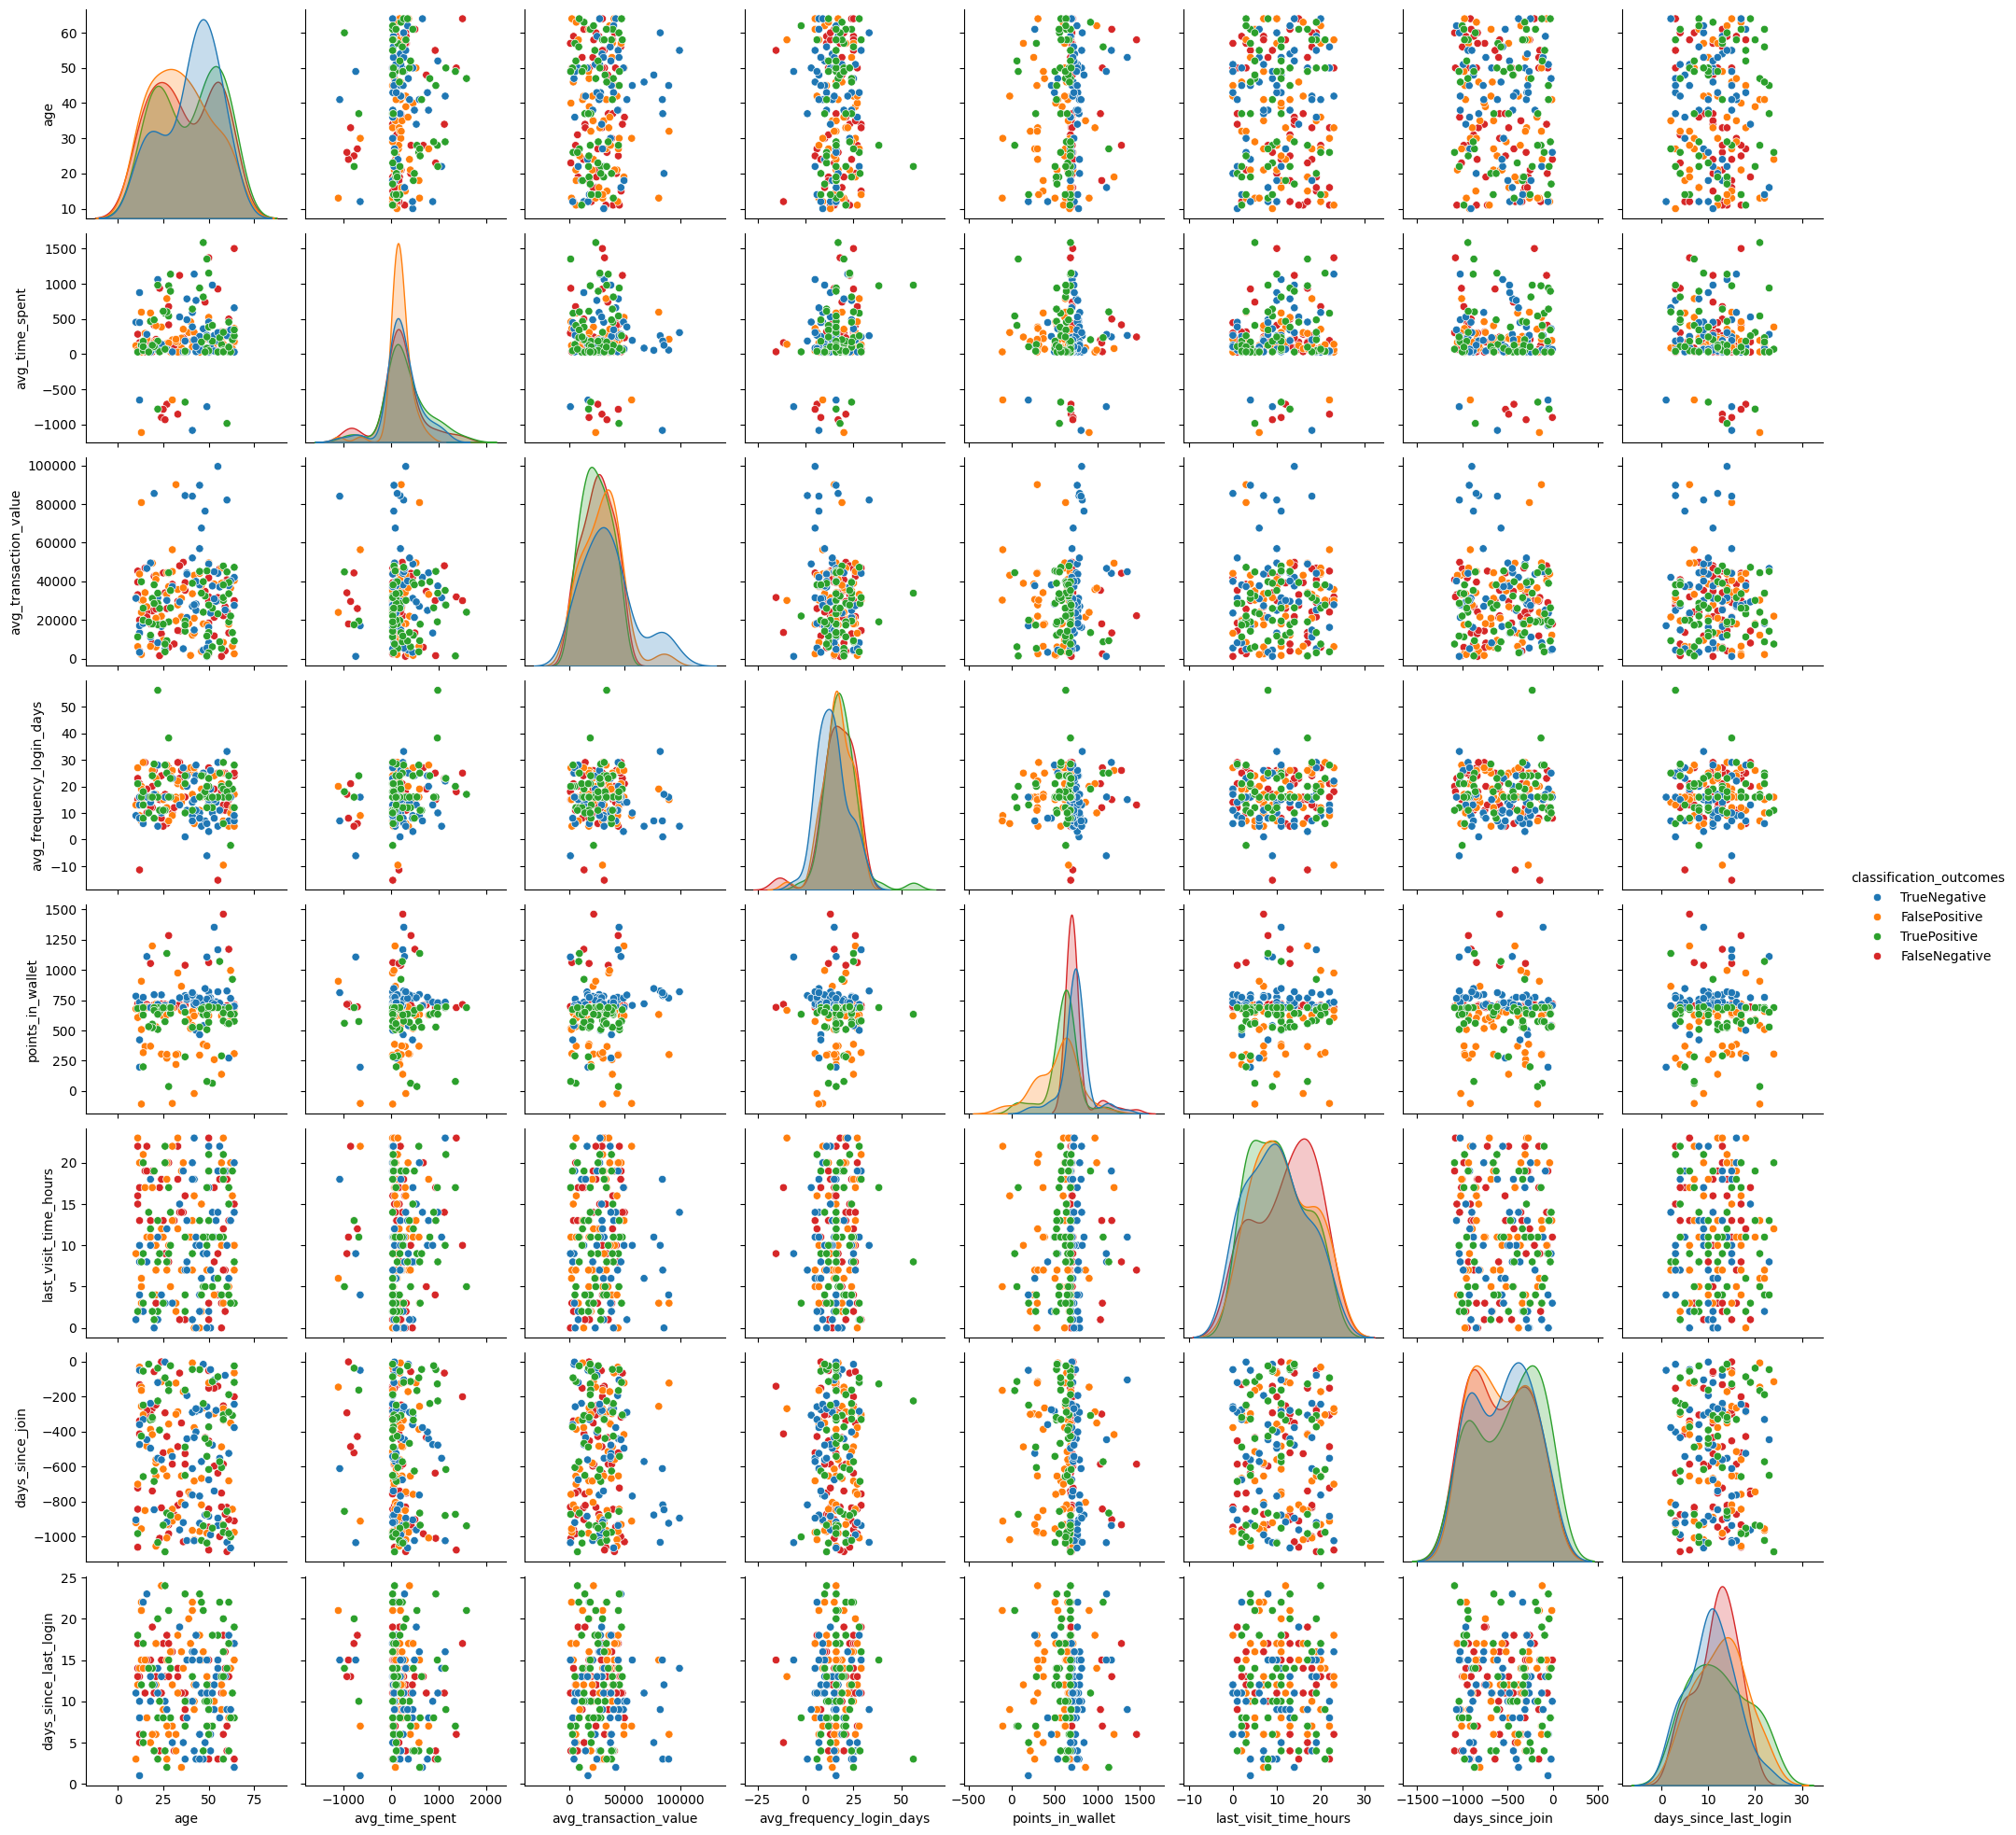

In [23]:
# Count the occurrences of each category
category_counts = df_test_eval['classification_outcomes'].value_counts()

# Set a sample size relatively to the count of the smallest category
sample_size = np.round(category_counts.min()/5).astype(int)

# Group the DataFrame by the category
grouped = df_test_eval.groupby('classification_outcomes')

# Sample each group to get a balanced DataFrame
balanced_df = grouped.apply(lambda x: x.sample(sample_size))

# Reset index of the resulting DataFrame
balanced_df = balanced_df.reset_index(drop=True)

#plot balanced df as pairplot
#take some hue_order as for the full dataset
sns.pairplot(balanced_df[num_features], hue='classification_outcomes', plot_kws=dict(alpha=1), hue_order= hue_order)

# DESCRIBE

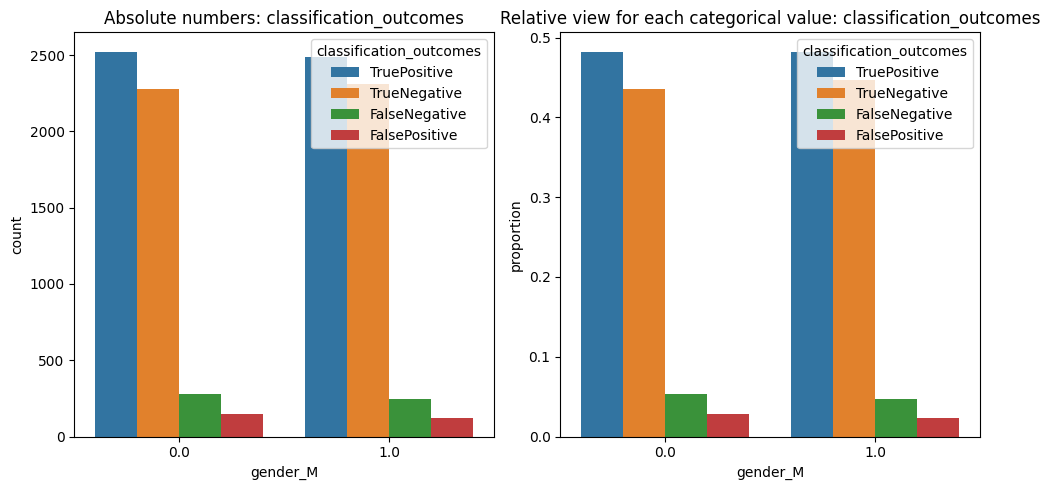

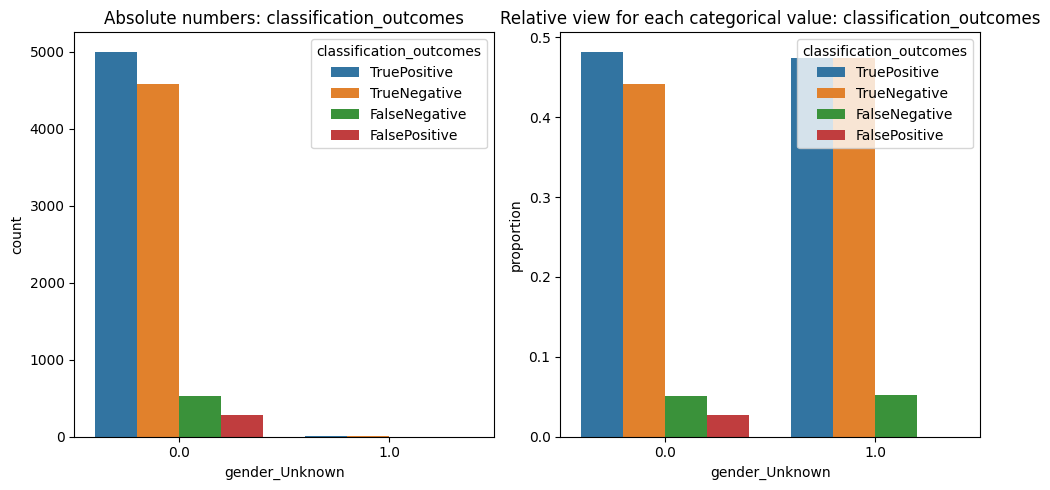

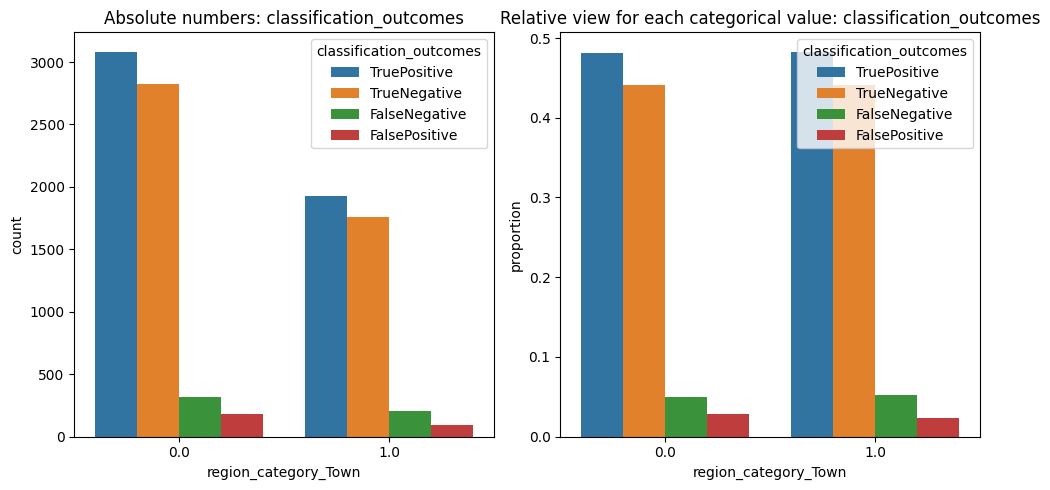

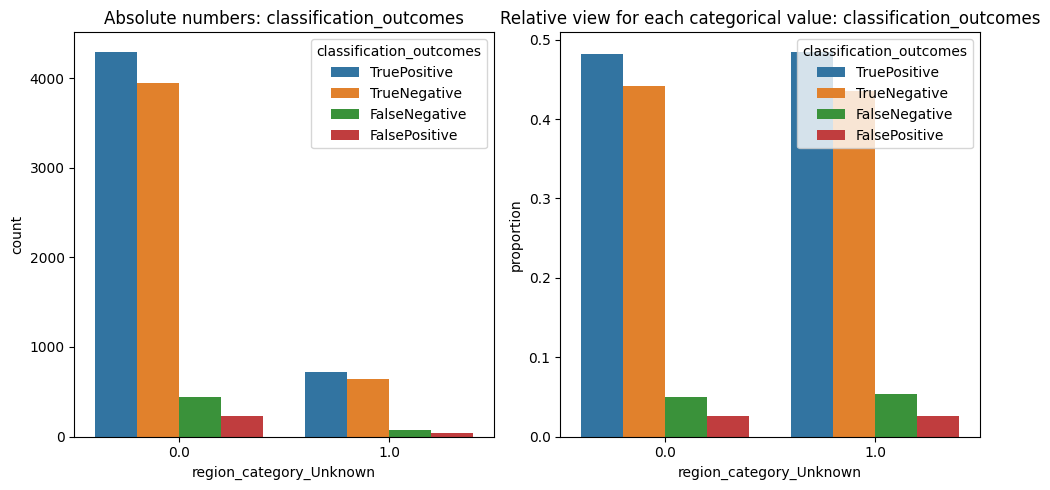

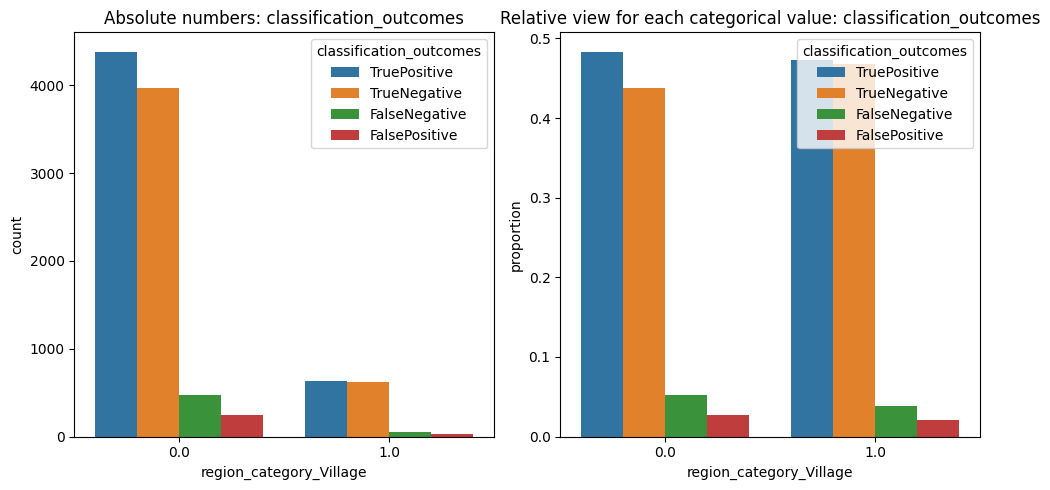

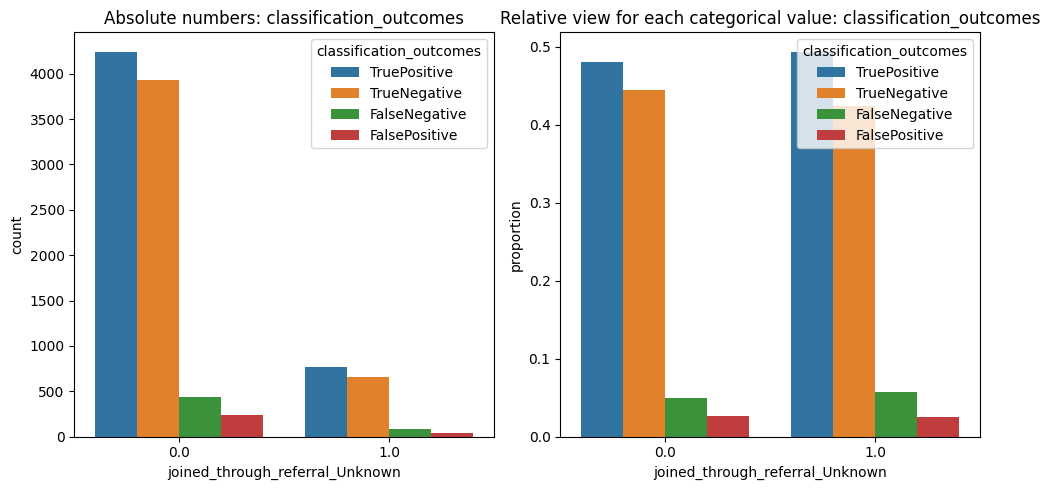

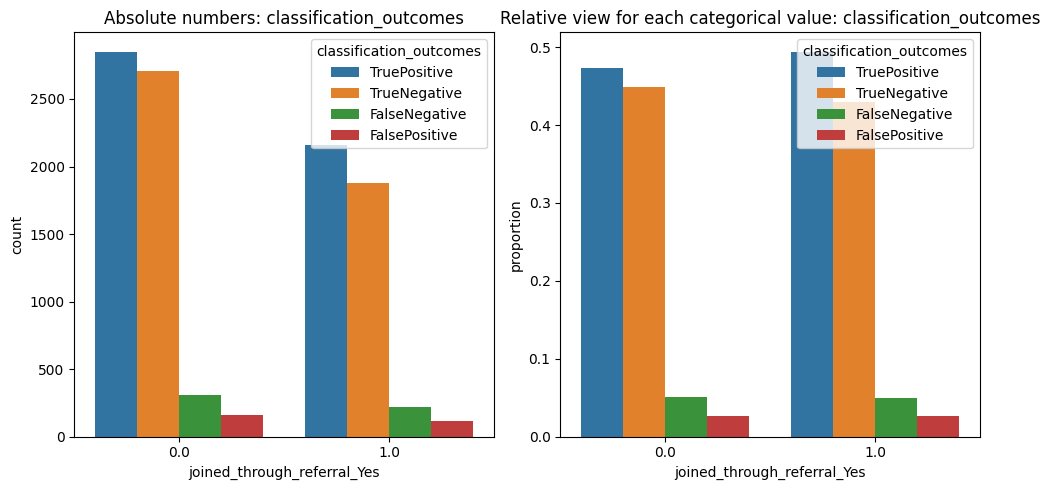

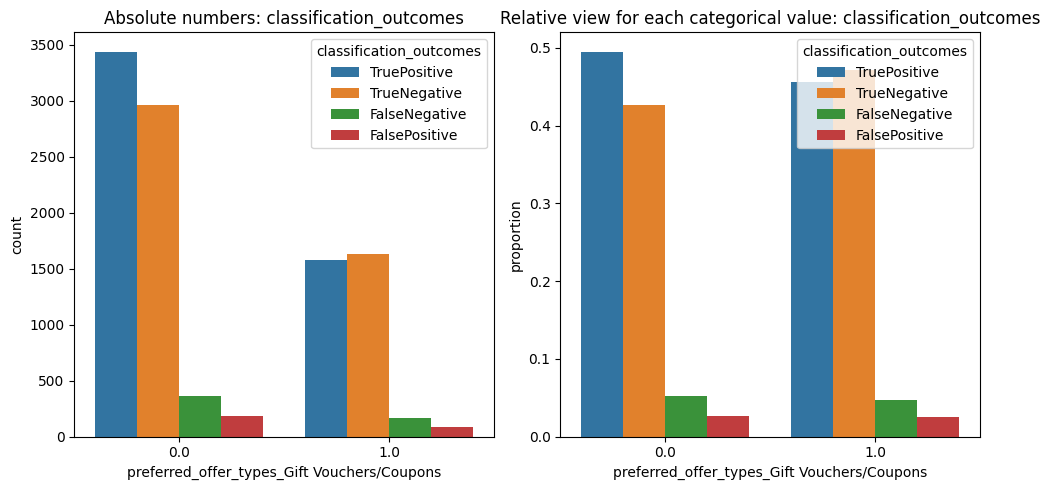

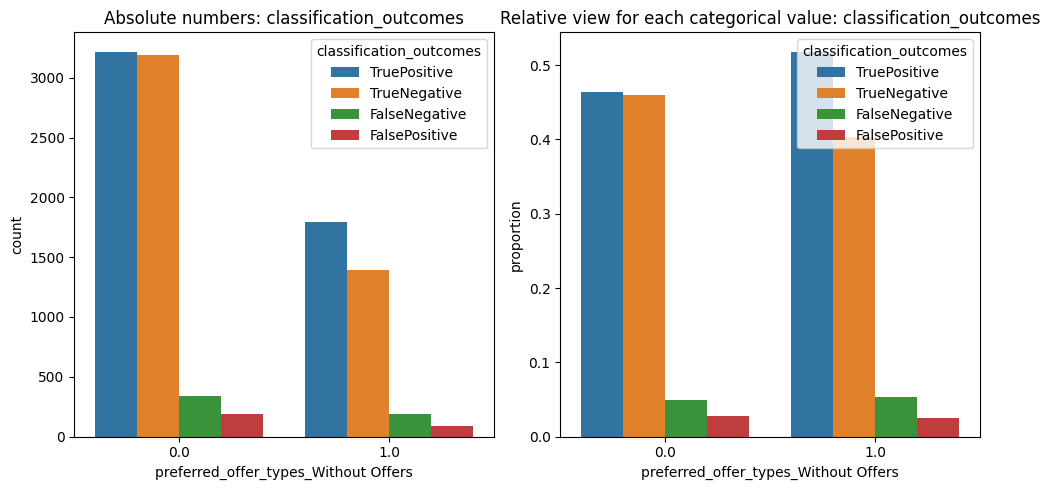

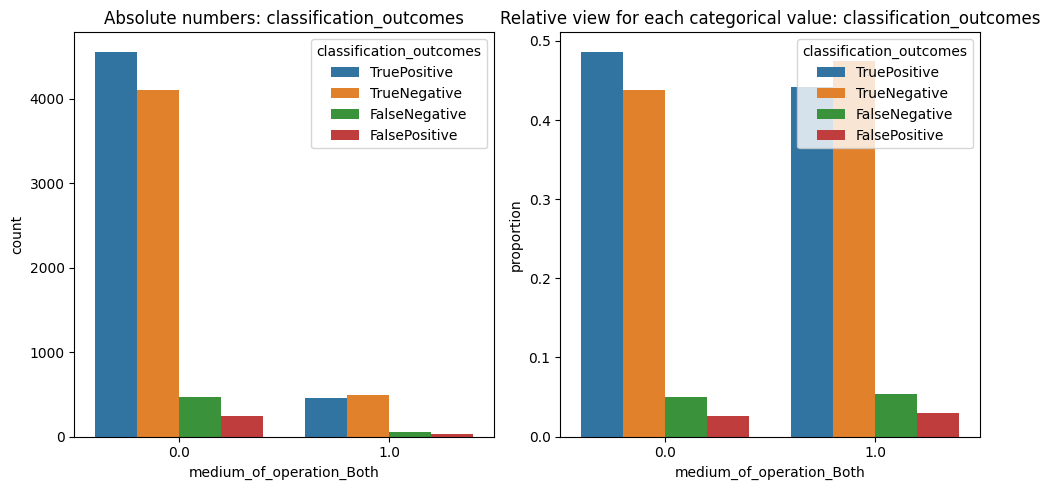

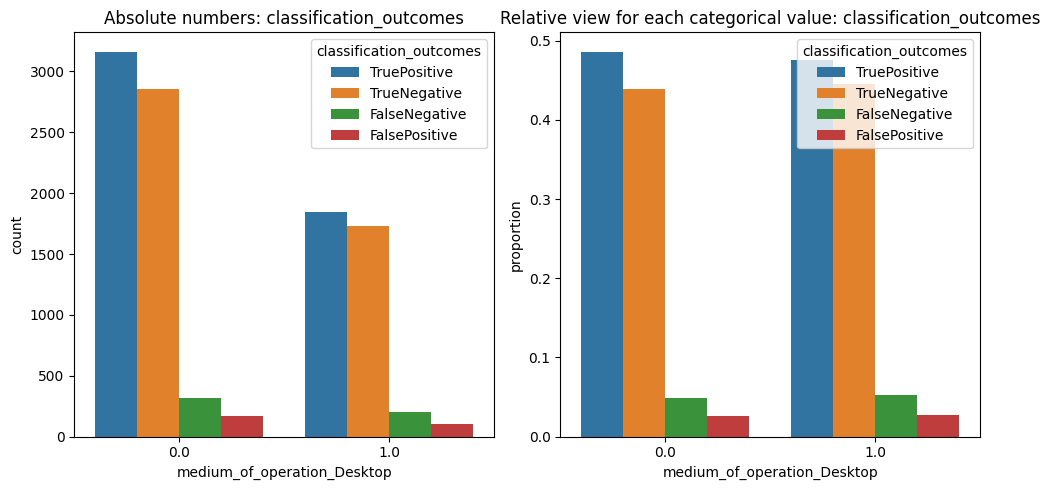

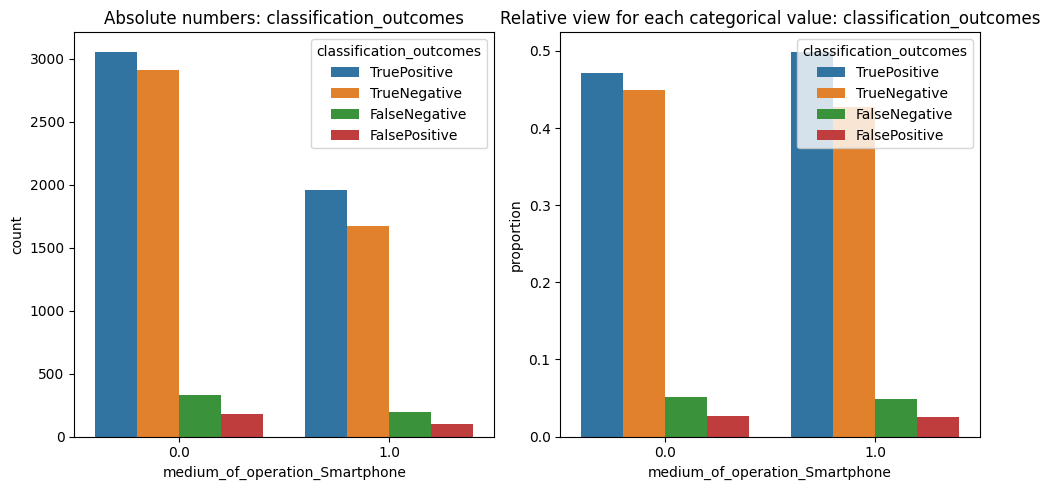

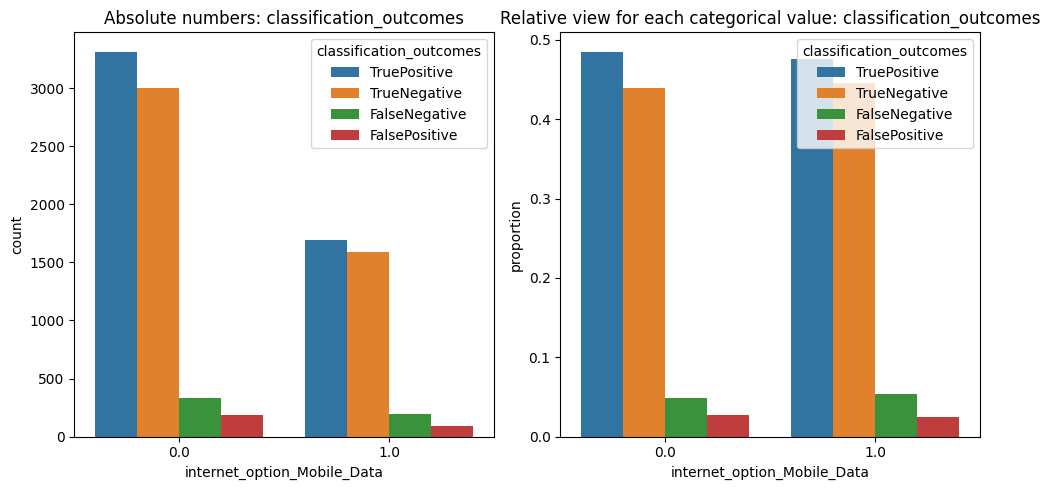

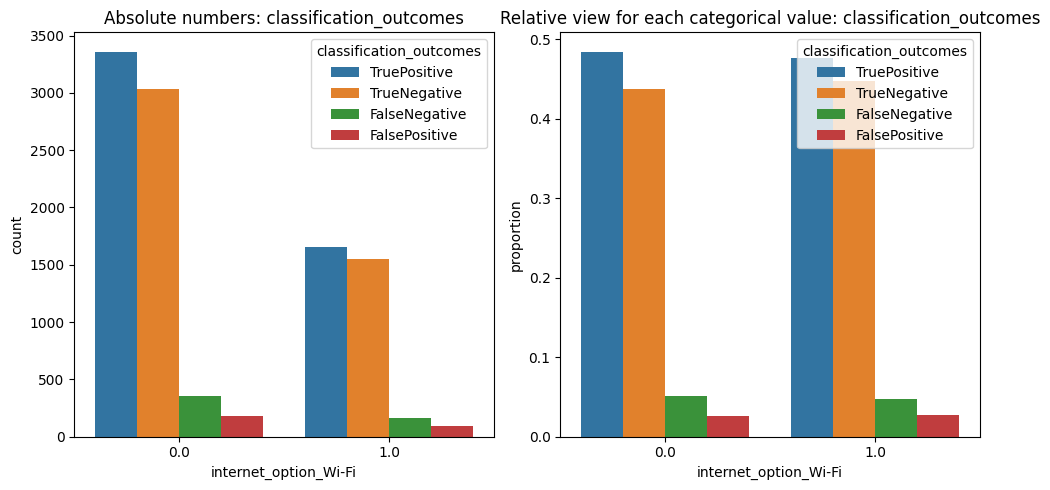

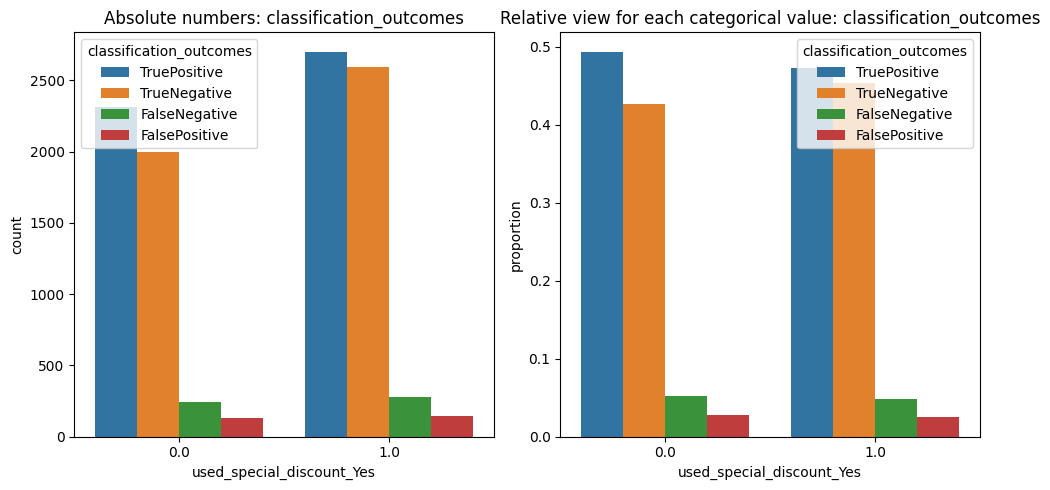

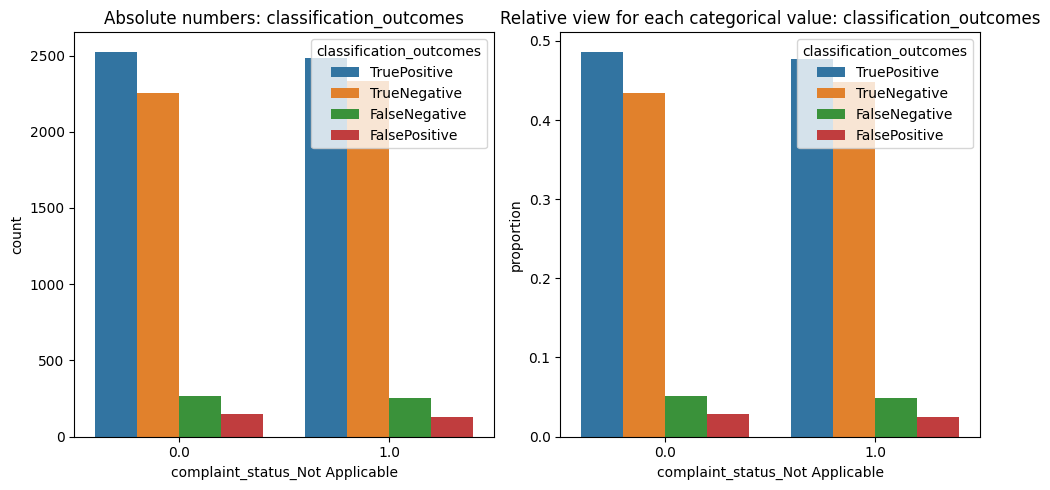

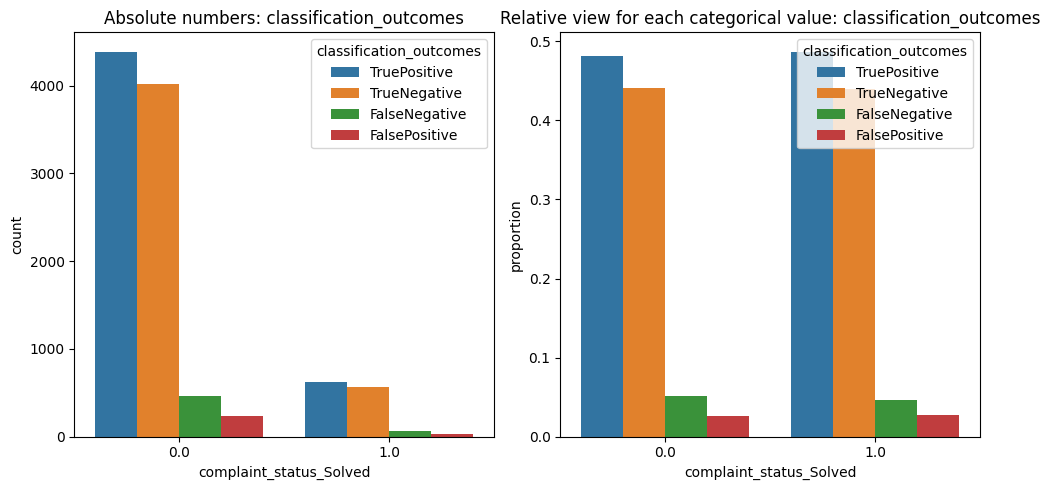

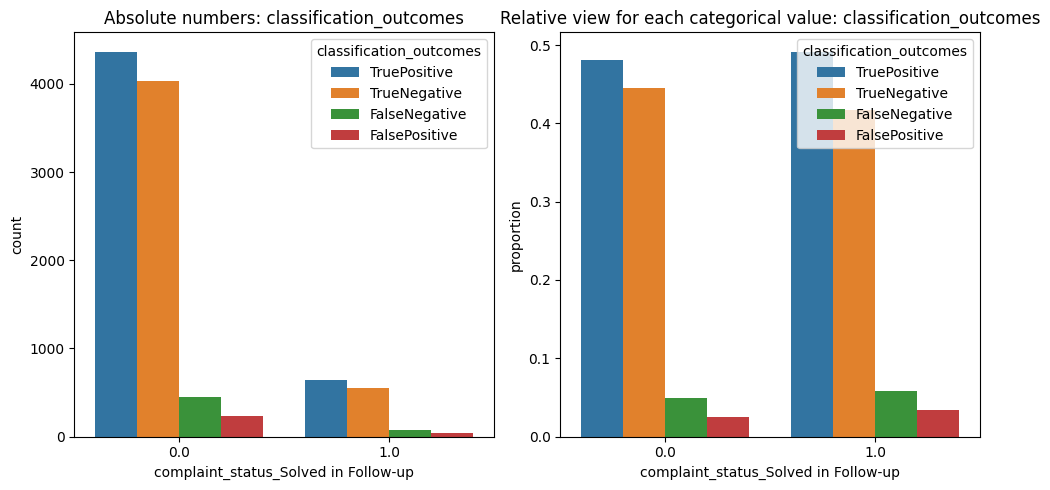

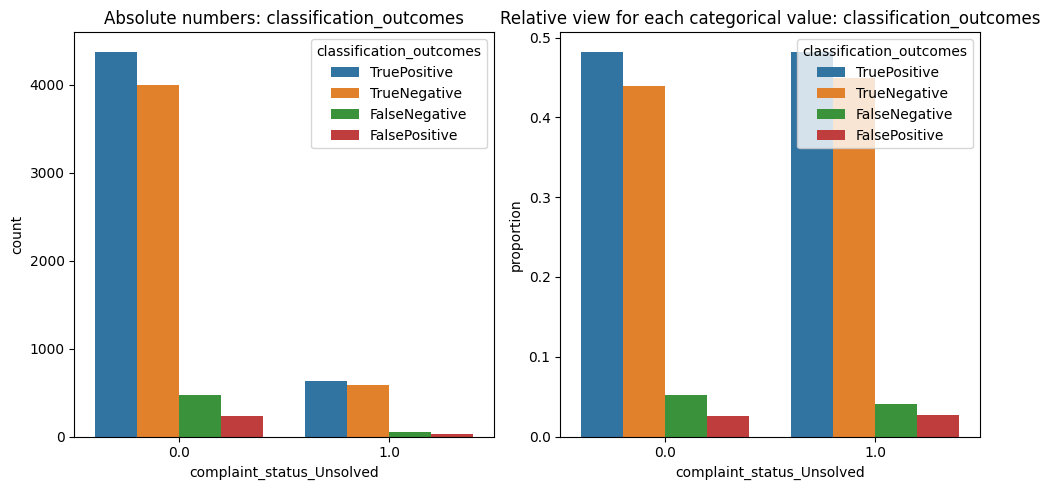

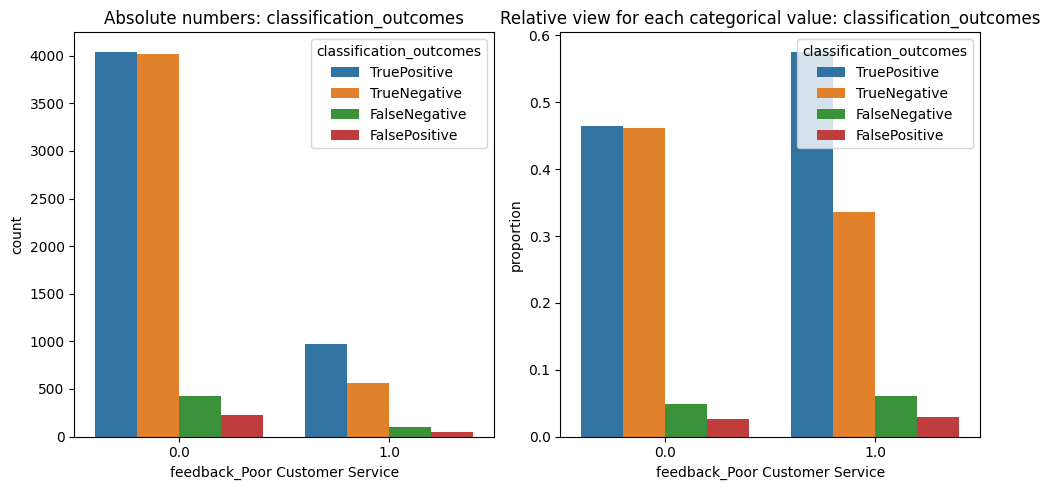

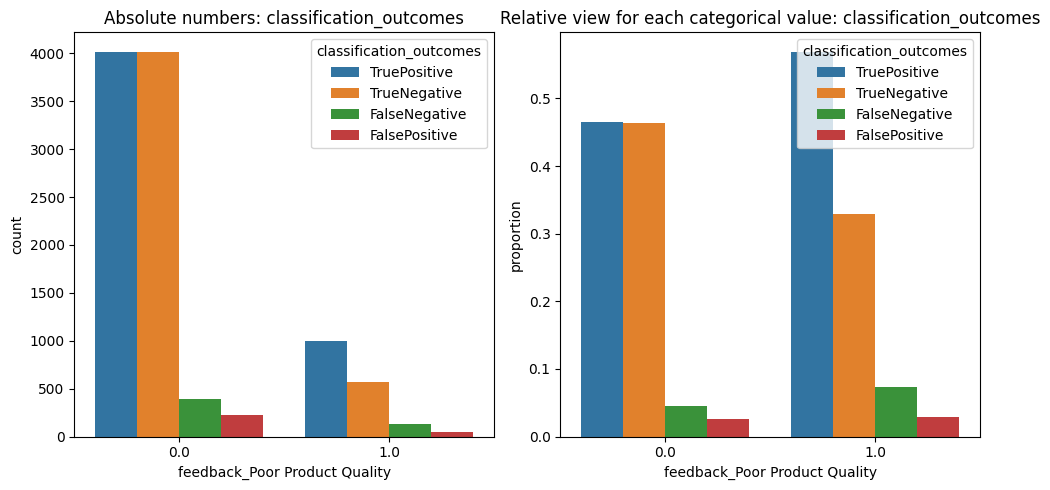

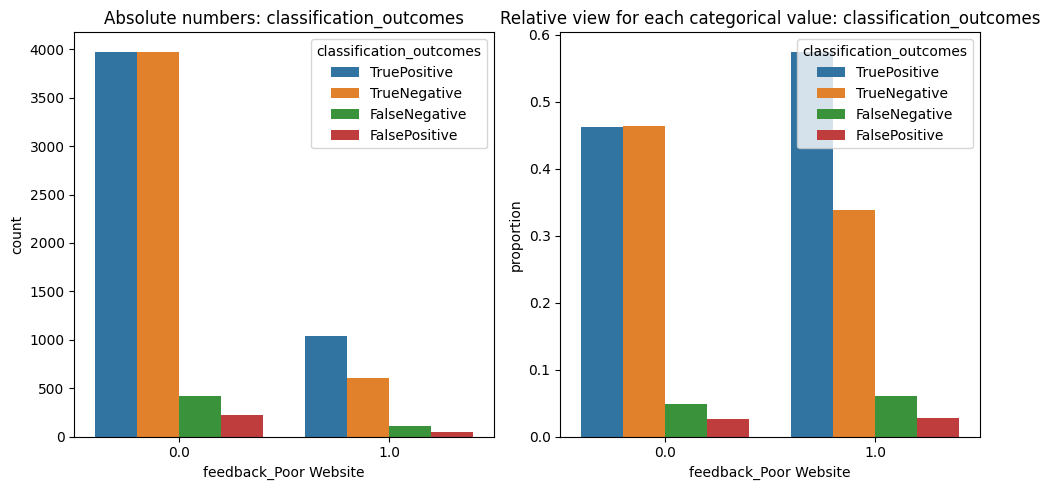

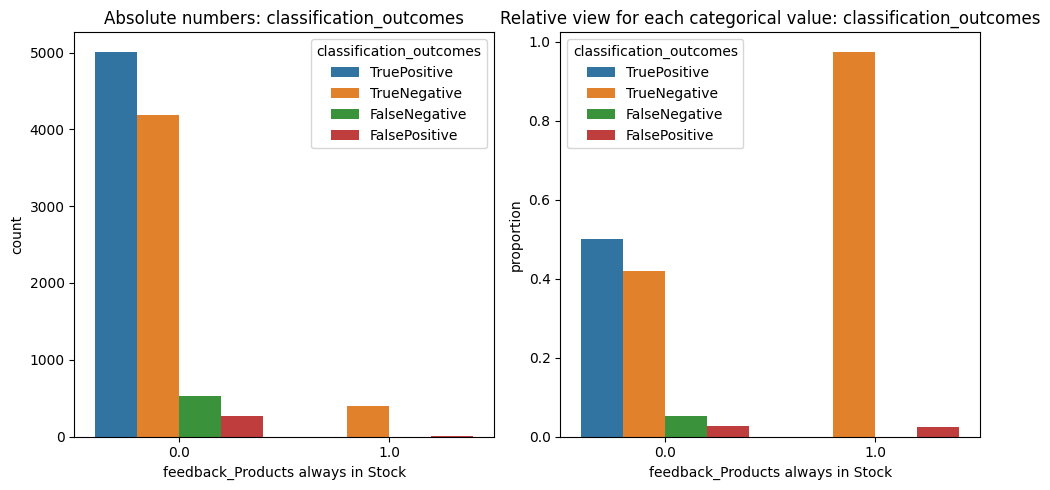

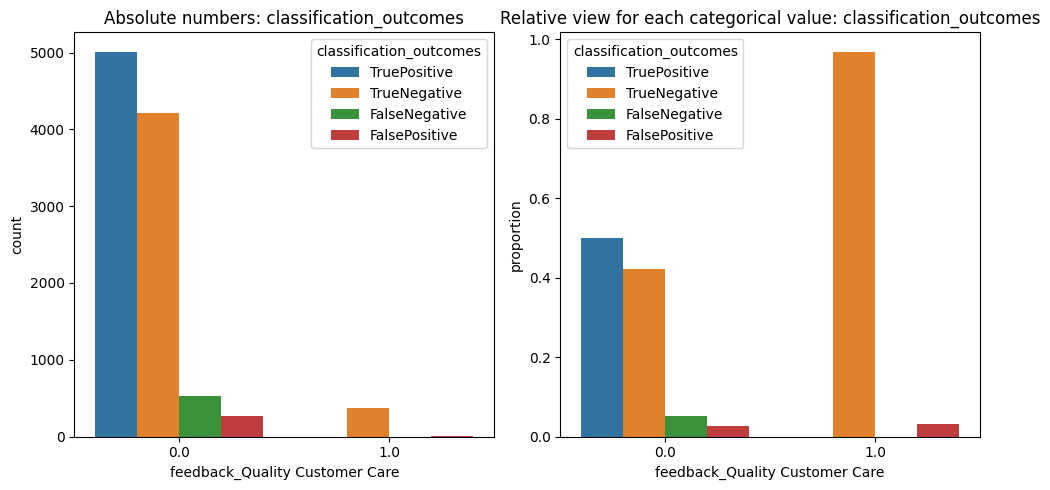

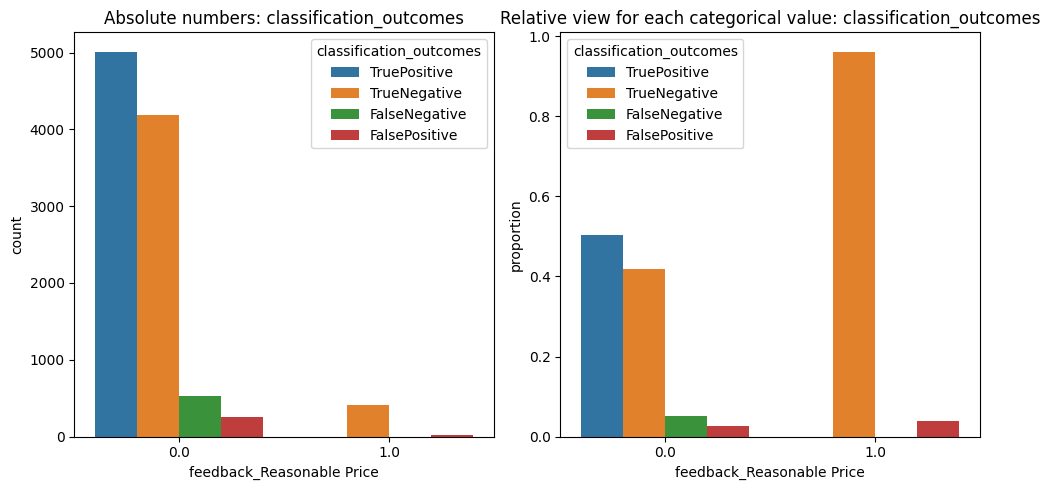

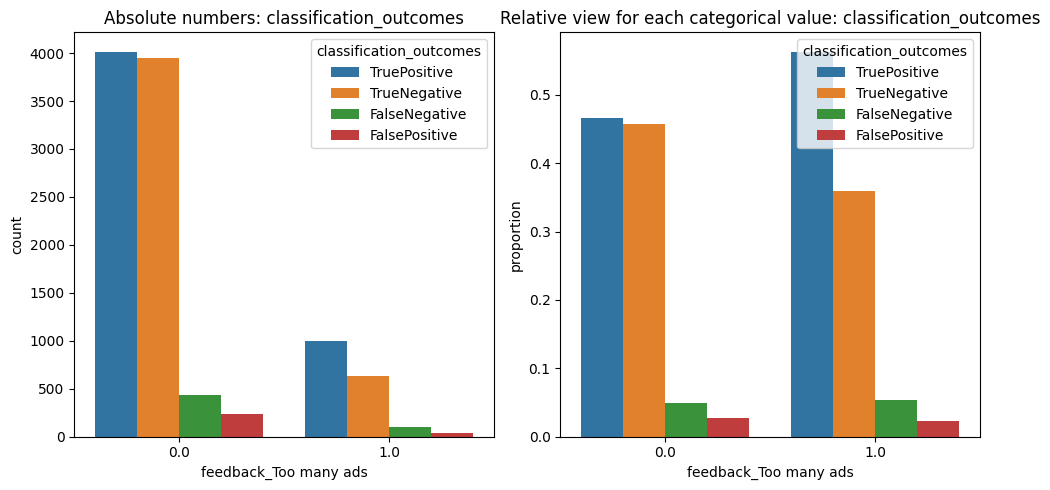

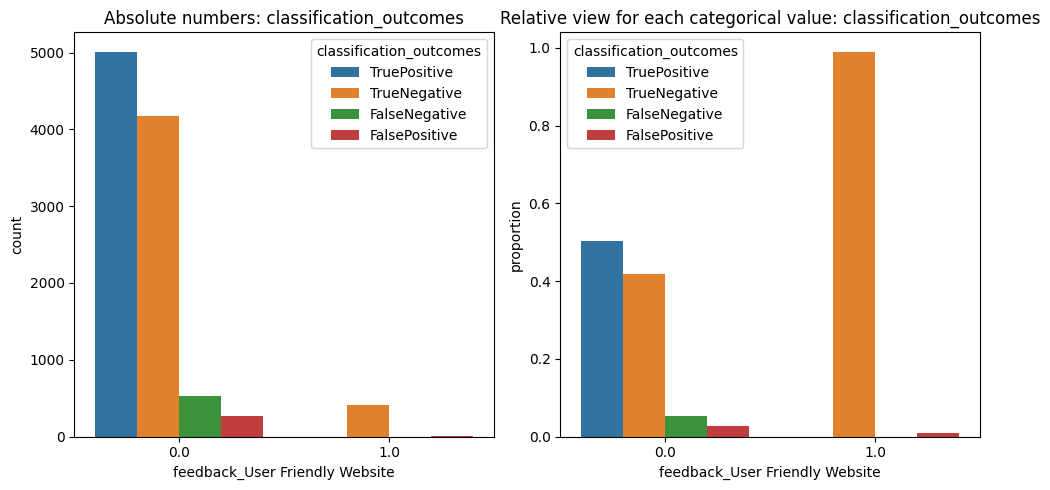

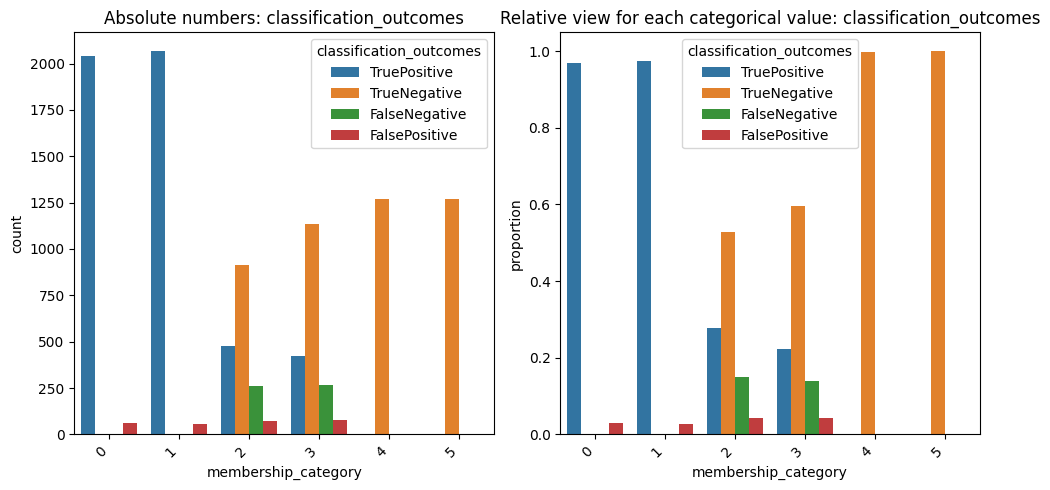

In [24]:
# Drop numerical features, predictions and ground truth ("churn_risk_score") to focus on categorical ones
categorical_features = [col for col in df_test_eval.columns if col not in num_features and col not in ["churn_risk_score", "y_pred"]]
# Plot a absolute an relative barplot of the classification outcome for each categorical feature
plot_categorical_features(df=df_test_eval, features=categorical_features, hue='classification_outcomes')

# Learnings
